In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

import warnings 
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('flipkart_com-ecommerce_sample.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [6]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [7]:
df.shape

(20000, 15)

In [8]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [9]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

# Data Cleaning & Pre-processing

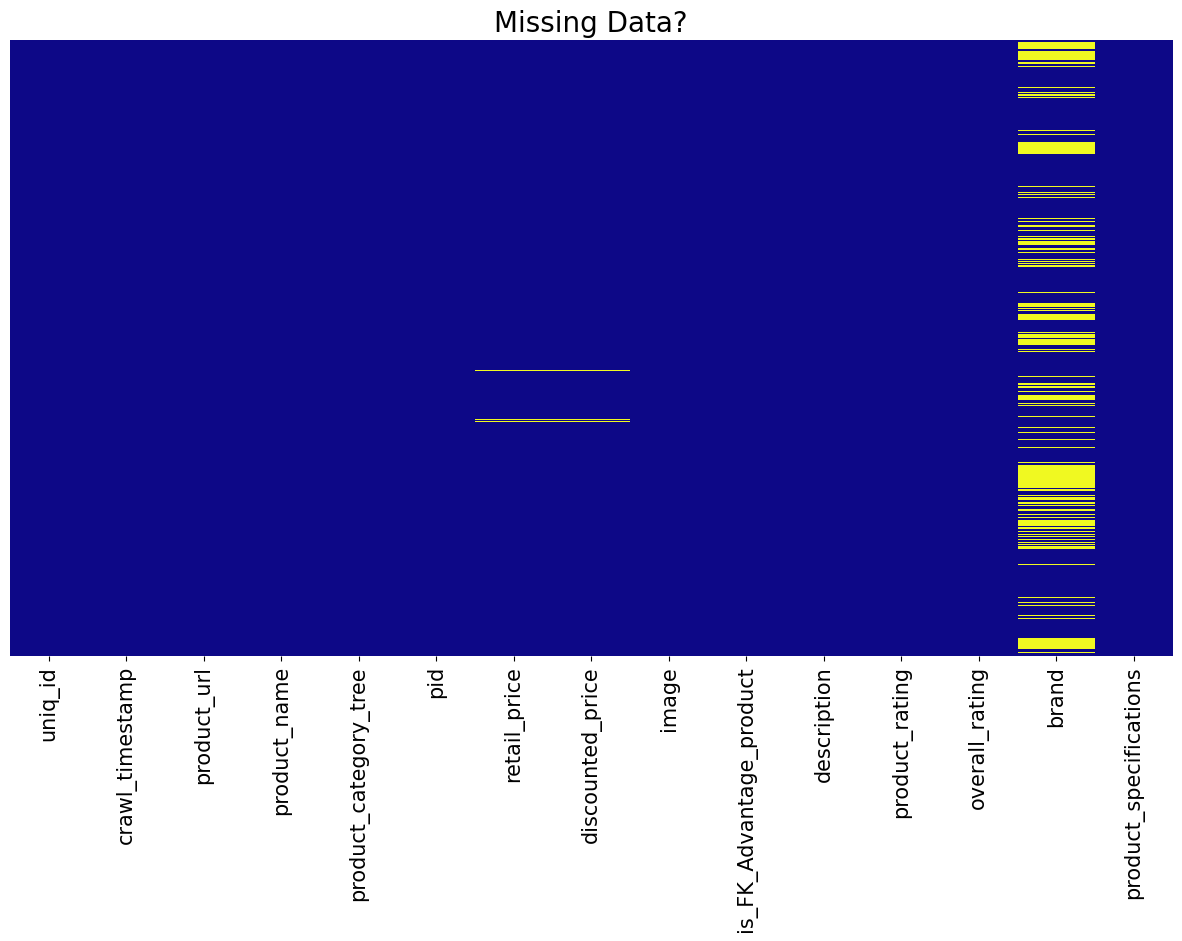

In [10]:
# check for any missing values in the columns
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),
            cmap='plasma',
            yticklabels=False,
            cbar=False)
plt.title('Missing Data?',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

# Brand column has many missing values


In [11]:
# check for any duplicate values present
df.duplicated().value_counts()

False    20000
Name: count, dtype: int64

# no duplicate values found

In [12]:
# check data type of each column in the dataframe
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

In [15]:
df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'])

# timestamp column needs to be in datetime type format


In [17]:
df.dtypes

uniq_id                                 object
crawl_timestamp            datetime64[ns, UTC]
product_url                             object
product_name                            object
product_category_tree                   object
pid                                     object
retail_price                           float64
discounted_price                       float64
image                                   object
is_FK_Advantage_product                   bool
description                             object
product_rating                          object
overall_rating                          object
brand                                   object
product_specifications                  object
crawl_year                               int64
crawl_month                              int64
dtype: object

In [18]:
df['crawl_year'] = df['crawl_timestamp'].apply(lambda x: x.year)
df['crawl_month'] = df['crawl_timestamp'].apply(lambda x: x.month)

In [ ]:
# lets have a look product category tree column

In [21]:
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,crawl_year,crawl_month
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3


In [22]:
print(df.product_category_tree[2])

["Footwear >> Women's Footwear >> Ballerinas >> AW Bellies"]


In [23]:
print(df.product_category_tree[2])
print('\n')

for i in df.product_category_tree[2].split('>>'):
    print(i)

["Footwear >> Women's Footwear >> Ballerinas >> AW Bellies"]


["Footwear 
 Women's Footwear 
 Ballerinas 
 AW Bellies"]


# Dividing the product_category_tree column into sub-category columns

In [24]:
df.product_category_tree[2].split('>>')[2][1:-1]

'Ballerinas'

In [25]:
#This .apply(lambda) will create a main category column starting from the first item in the product_category_tree column

df['MainCategory'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0][2:-1])

In [26]:
df['MainCategory'][2]

'Footwear'

In [27]:
def secondary(x):
    try:
        return x.split('>>')[1][1:]
    except IndexError:
        return 'None '
    
def tertiary(x):
    try:
        return x.split('>>')[2][1:]
    except IndexError:
        return 'None '
    
def quaternary(x):
    try:
        return x.split('>>')[3][1:]
    except IndexError:
        return 'None '

# These functions will be .apply() to the df. These functions will draw the second, third and fourth items from the product_category_tree
# try except statements used because an index error occurs when there is no second/third/fourth item in the product_category_tree.

In [28]:
df['SecondaryCategory'] = df['product_category_tree'].apply(secondary)
df['TertiaryCategory'] = df['product_category_tree'].apply(tertiary)
df['QuaternaryCategory'] = df['product_category_tree'].apply(quaternary)

In [32]:
df.shape

(20000, 21)

In [33]:
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,crawl_year,crawl_month,MainCategory,SecondaryCategory,TertiaryCategory,QuaternaryCategory
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies""]"


# lets focus on the sales column

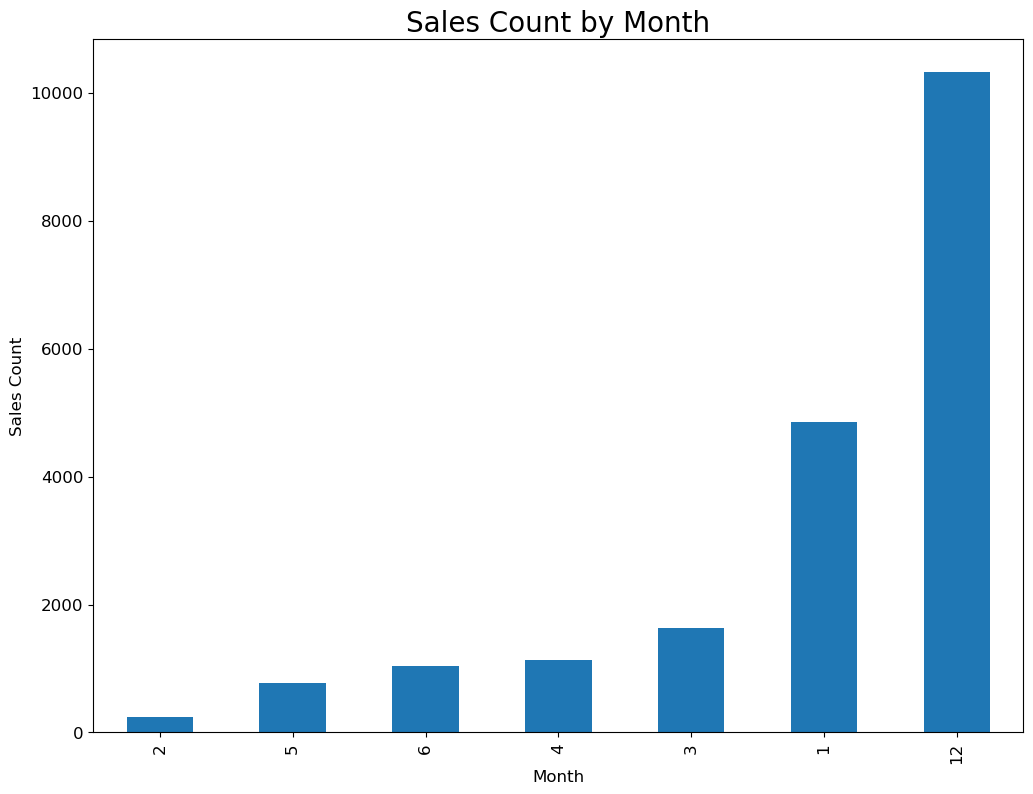

In [34]:
plt.figure(figsize=(12,9))
df['crawl_month'].value_counts().sort_values().plot(kind='bar')
plt.title('Sales Count by Month',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Sales Count',fontsize=12)
plt.show()

In [ ]:
# sales data is missing for the months 7 to 11

In [35]:
print(df.groupby('crawl_month')['crawl_month'].count())

crawl_month
1      4850
2       245
3      1634
4      1137
5       773
6      1046
12    10315
Name: crawl_month, dtype: int64


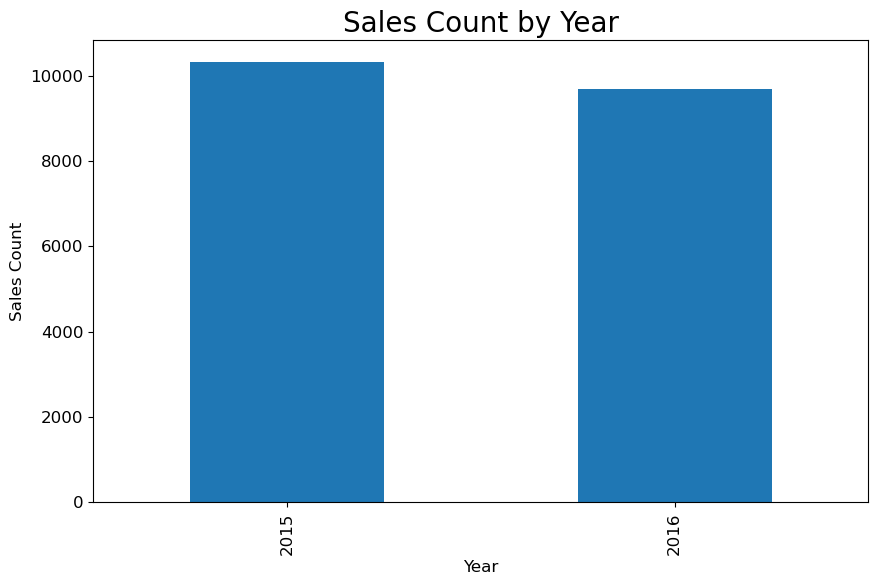

In [36]:
# sales count by year
plt.figure(figsize=(10,6))
df.groupby('crawl_year')['crawl_year'].count().plot(kind='bar')
plt.title('Sales Count by Year',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales Count',fontsize=12)
plt.show()

In [37]:
print(df.groupby('crawl_year')['crawl_year'].count())

crawl_year
2015    10315
2016     9685
Name: crawl_year, dtype: int64


In [ ]:
# lets shift focus to sales by category, because there's only two years of data

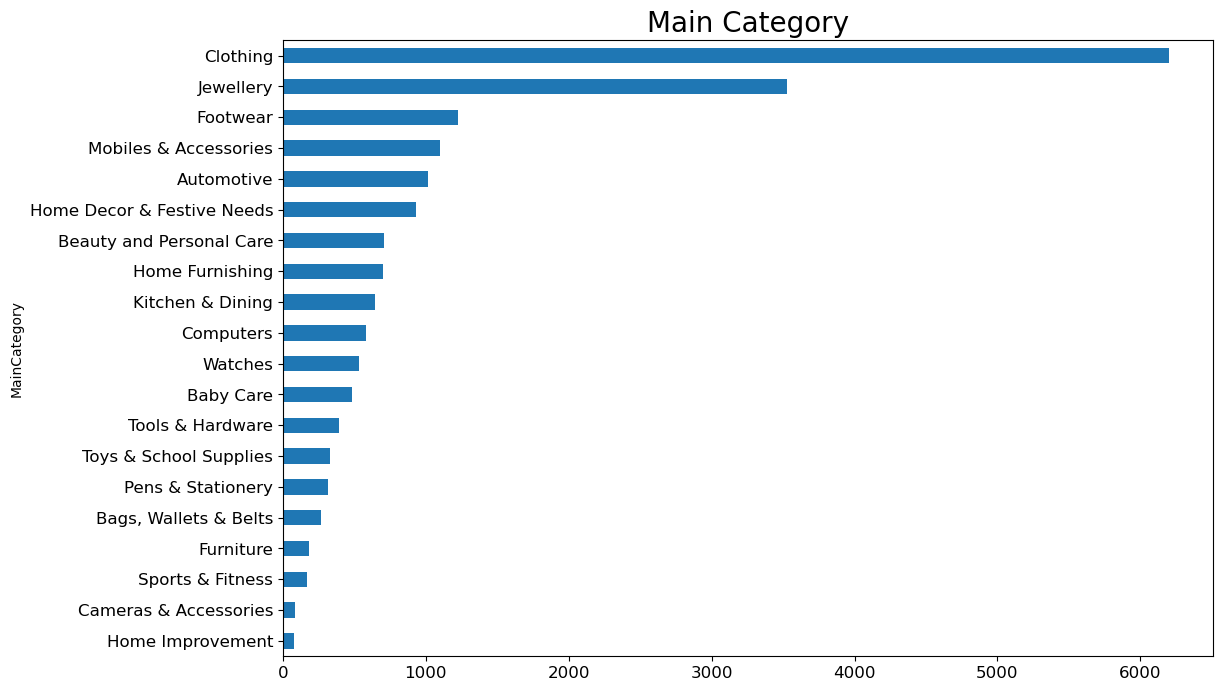

In [38]:
plt.figure(figsize=(12,8))
df['MainCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Main Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [39]:
print('Top Ten Main Categories by Sales.\n')
print(df['MainCategory'].value_counts()[:10])

Top Ten Main Categories by Sales.

MainCategory
Clothing                      6198
Jewellery                     3531
Footwear                      1227
Mobiles & Accessories         1099
Automotive                    1012
Home Decor & Festive Needs     929
Beauty and Personal Care       710
Home Furnishing                700
Kitchen & Dining               647
Computers                      578
Name: count, dtype: int64


# Clothing, Jewellery, Shoes, electronics and automotive are the main category sales driver

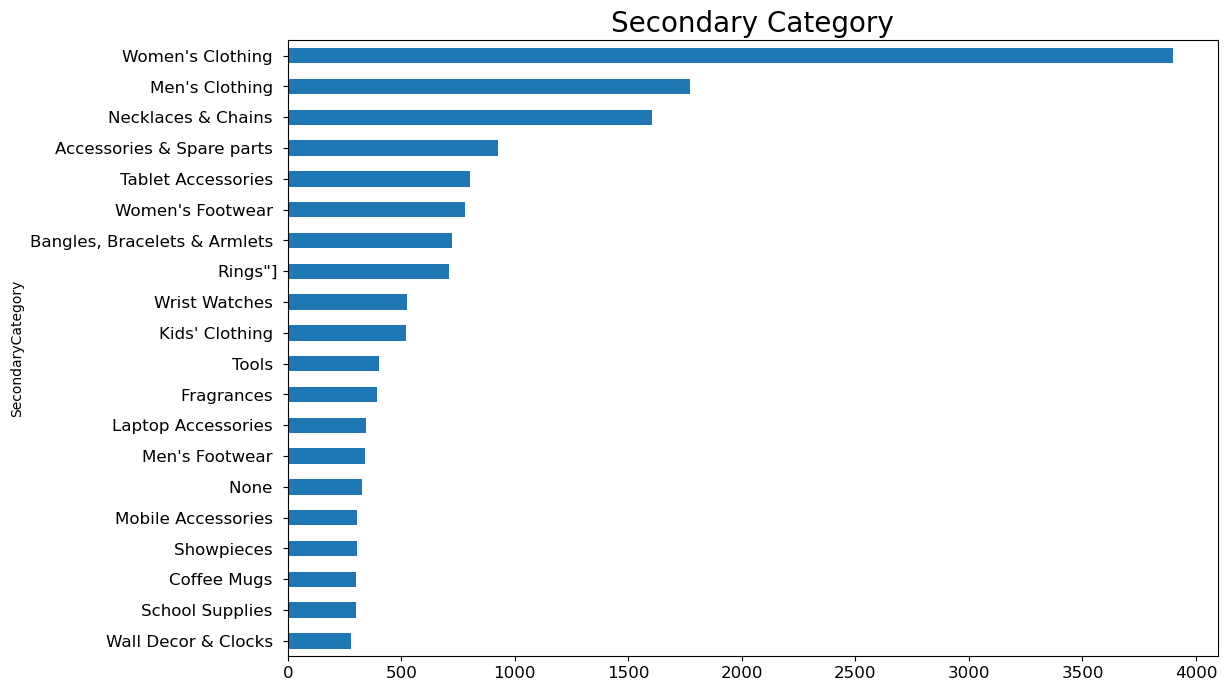

In [40]:
# sales by category for second-cateogry
plt.figure(figsize=(12,8))
df['SecondaryCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Secondary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [41]:
print('Top Ten Secondary Categories by Sales.\n')
print(df['SecondaryCategory'].value_counts()[:10])

Top Ten Secondary Categories by Sales.

SecondaryCategory
Women's Clothing                 3901
Men's Clothing                   1773
Necklaces & Chains               1606
Accessories & Spare parts         925
Tablet Accessories                801
Women's Footwear                  781
Bangles, Bracelets & Armlets      724
Rings"]                           710
Wrist Watches                     523
Kids' Clothing                    520
Name: count, dtype: int64


# Sales from women's clothing is more than double that of men's clothing. Also necklaces & chains sale is close to the sale of men's clothing.

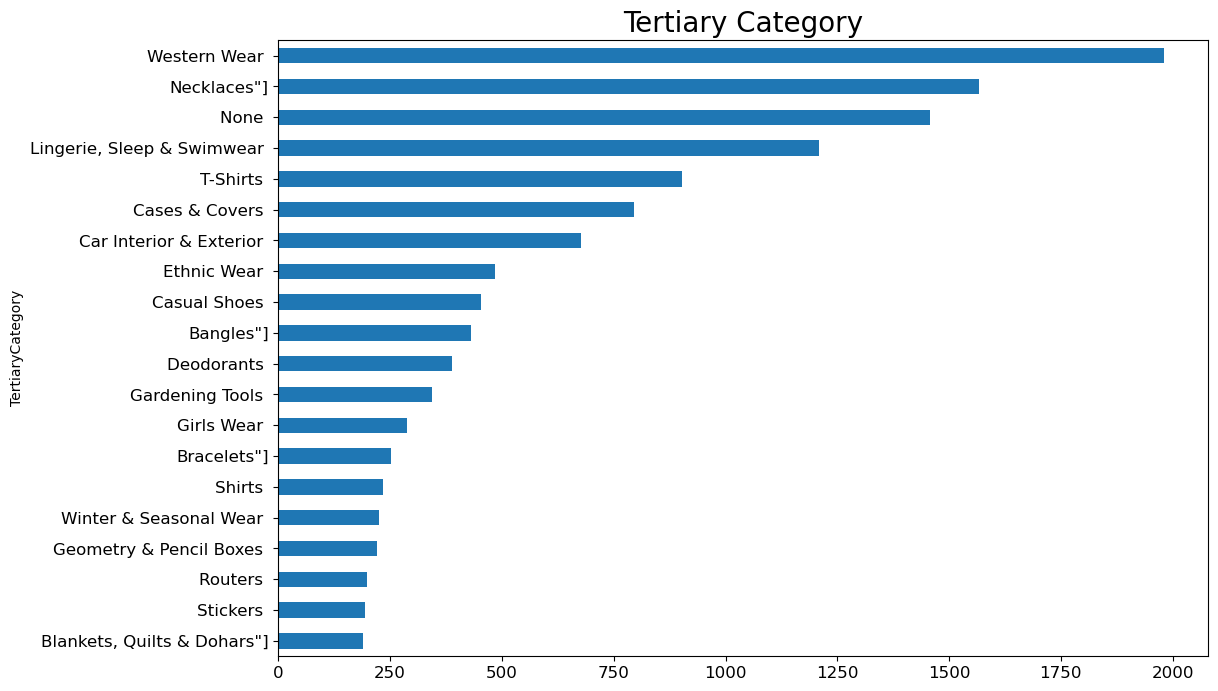

In [42]:
# Sales by category for tertiary category
plt.figure(figsize=(12,8))
df['TertiaryCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Tertiary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [43]:
print('Top Ten Tertiary Categories by Sales.\n')
print(df['TertiaryCategory'].value_counts()[:10])

Top Ten Tertiary Categories by Sales.

TertiaryCategory
Western Wear                   1981
Necklaces"]                    1567
None                           1457
Lingerie, Sleep & Swimwear     1208
T-Shirts                        903
Cases & Covers                  796
Car Interior & Exterior         677
Ethnic Wear                     485
Casual Shoes                    454
Bangles"]                       430
Name: count, dtype: int64


# Western wear clothings derive the highest sales in tertiary category alongsode necklaces.

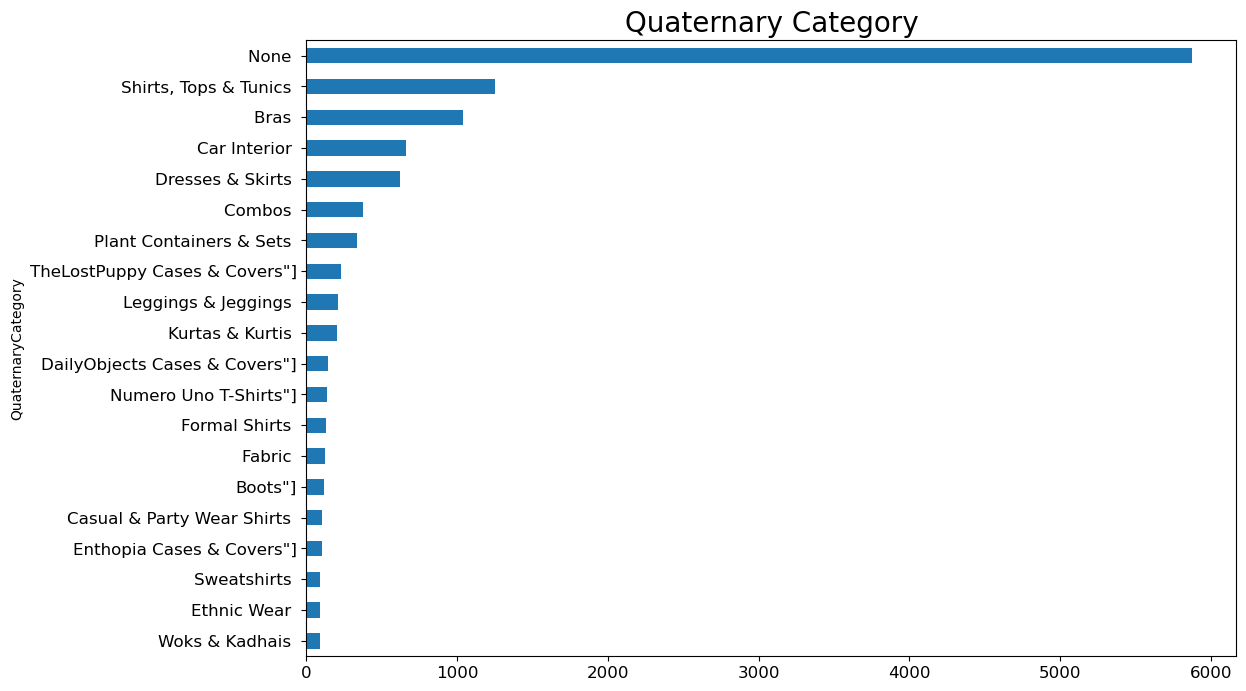

In [44]:
plt.figure(figsize=(12,8))
df['QuaternaryCategory'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Quaternary Category',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [45]:
print('Top Ten Quaternary Categories by Sales.\n')
print(df['QuaternaryCategory'].value_counts()[:10])

Top Ten Quaternary Categories by Sales.

QuaternaryCategory
None                             5876
Shirts, Tops & Tunics            1249
Bras                             1036
Car Interior                      659
Dresses & Skirts                  620
Combos                            375
Plant Containers & Sets           333
TheLostPuppy Cases & Covers"]     229
Leggings & Jeggings               209
Kurtas & Kurtis                   202
Name: count, dtype: int64


In [47]:
# let's check the most expensive item in flipkart store
df['retail_price'].max()
# df[df['retail_price'].max()]

571230.0

In [49]:
df[df['retail_price'] == 571230.0]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,crawl_year,crawl_month,MainCategory,SecondaryCategory,TertiaryCategory,QuaternaryCategory
116,329c5f4d7aced63e1ce3e88f41d5e7e6,2015-12-04 07:25:36+00:00,http://www.flipkart.com/breitling-ab011010-bb0...,Breitling AB011010/BB08 131S Chronomat 44 Anal...,"[""Watches >> Wrist Watches >> Breitling Wrist ...",WATE9DX9E4YSRJSY,571230.0,571230.0,"[""http://img5a.flixcart.com/image/watch/j/s/y/...",False,...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",2015,12,Watches,Wrist Watches,"Breitling Wrist Watches""]",None


In [ ]:
# The most expensive item in flipkart store is Watch

# Lets focus on the Discounted sales section

In [52]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'crawl_year',
       'crawl_month', 'MainCategory', 'SecondaryCategory', 'TertiaryCategory',
       'QuaternaryCategory', 'discount_%'],
      dtype='object')

In [53]:
# discount percent = ((retail - sale) / retail) * 100

df['discount_%'] = round(((df['retail_price'] - df['discounted_price']) / df['retail_price'] * 100),1) 

In [54]:
df[['product_name','retail_price','discounted_price','discount_%']].head()

,product_name,retail_price,discounted_price,discount_%
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,62.1
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,29.6
2,AW Bellies,999.0,499.0,50.1
3,Alisha Solid Women's Cycling Shorts,699.0,267.0,61.8
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,4.5


# Next we are going to create a few new dataframes that contain the product by category, average discounted percentages and count of each product.

In [55]:
df['MainCategory'].value_counts()

MainCategory
Clothing                                                6198
Jewellery                                               3531
Footwear                                                1227
Mobiles & Accessories                                   1099
Automotive                                              1012
                                                        ... 
Mast & Harbour Gold Synthetic  Clutch"                     1
Asics Gel-Cumulus 17 Running Shoes"                        1
Glacier Running Shoes"                                     1
Starsy Solid Women's Round Neck Green T-Shirt"             1
Areon Luxurious Fragrance Long Lasting Car,Home,..."       1
Name: count, Length: 266, dtype: int64

In [56]:
MainCategoryDiscount = pd.DataFrame(df.groupby('MainCategory').agg({
    'discount_%':[(np.mean)],
    'MainCategory':['count']
}))

SecondaryCategoryDiscount = pd.DataFrame(df.groupby('SecondaryCategory').agg({
    'discount_%':[np.mean],
    'SecondaryCategory':['count']
}))

TertiaryCategoryDiscount = pd.DataFrame(df.groupby('TertiaryCategory').agg({
    'discount_%':[np.mean],
    'TertiaryCategory':['count']
}))

QuaternaryCategoryDiscount = pd.DataFrame(df.groupby('QuaternaryCategory').agg({
    'discount_%':[np.mean],
    'QuaternaryCategory':['count']
}))

In [57]:
MainCategoryDiscount.head()

,discount_%,MainCategory
,mean,count
MainCategory,,
"883 Police Full Sleeve Solid Men's Jacket""",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""",27.6,1
"ANAND ARCHIES Girls Flats""",10.0,2
"ANAND ARCHIES Girls Wedges""",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""",0.0,1


In [ ]:
# We are going to combine the levels of the columns for visualization purposes.

In [58]:
MainCategoryDiscount.columns = ['_'.join(col) for col in MainCategoryDiscount.columns]
SecondaryCategoryDiscount.columns = ['_'.join(col) for col in SecondaryCategoryDiscount.columns]
TertiaryCategoryDiscount.columns = ['_'.join(col) for col in TertiaryCategoryDiscount.columns]
QuaternaryCategoryDiscount.columns = ['_'.join(col) for col in QuaternaryCategoryDiscount.columns]

In [60]:
MainCategoryDiscount.head()

,discount_%_mean,MainCategory_count
MainCategory,,
"883 Police Full Sleeve Solid Men's Jacket""",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""",27.6,1
"ANAND ARCHIES Girls Flats""",10.0,2
"ANAND ARCHIES Girls Wedges""",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""",0.0,1


In [61]:
MainCategoryDiscount.columns

Index(['discount_%_mean', 'MainCategory_count'], dtype='object')

In [63]:
MainCategoryDiscount = MainCategoryDiscount.sort_values(by=['MainCategory_count'],ascending=False)[:20]
SecondaryCategoryDiscount = SecondaryCategoryDiscount.sort_values(by=['SecondaryCategory_count'],ascending=False)[:20]
TertiaryCategoryDiscount = TertiaryCategoryDiscount.sort_values(by=['TertiaryCategory_count'],ascending=False)[:20]
QuaternaryCategoryDiscount = QuaternaryCategoryDiscount.sort_values(by=['QuaternaryCategory_count'],ascending=False)[:20]

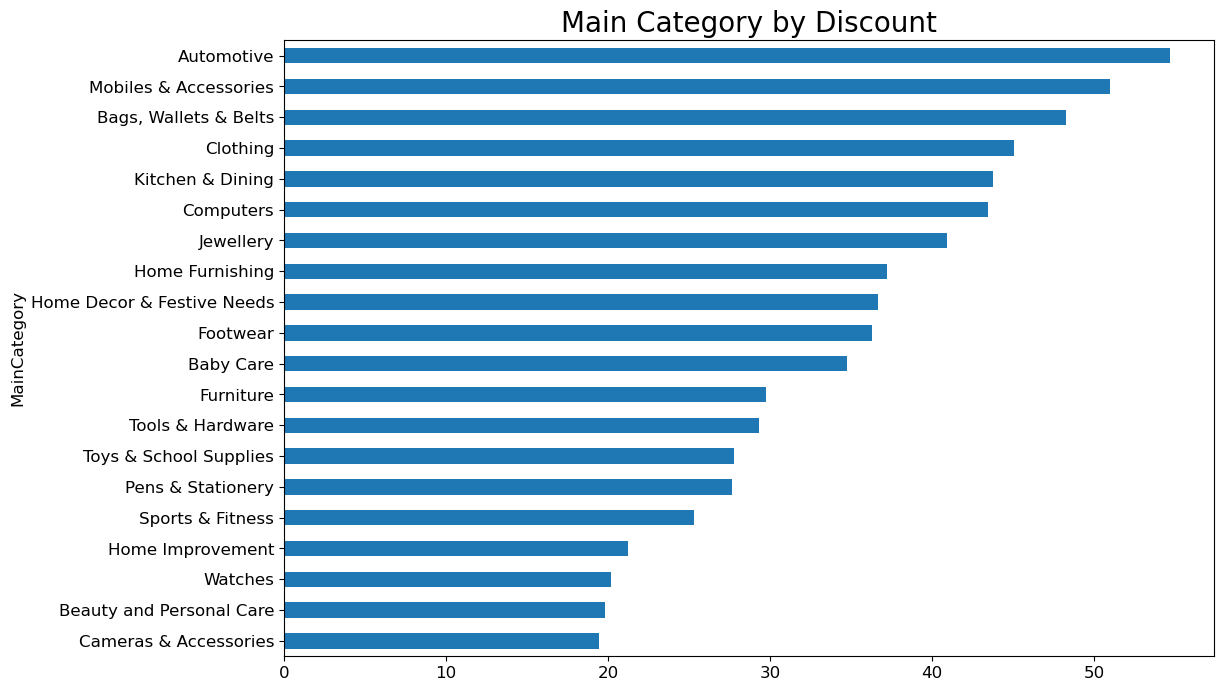

In [64]:
plt.figure(figsize=(12,8))
MainCategoryDiscount['discount_%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Main Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('MainCategory',fontsize=12)
plt.show()

In [65]:
print('Main Category by Discount (Percentage)\n')
print(MainCategoryDiscount['discount_%_mean'].sort_values(ascending=False)[:8])

Main Category by Discount (Percentage)

MainCategory
Automotive               54.649901
Mobiles & Accessories    51.001185
Bags, Wallets & Belts    48.271591
Clothing                 45.071301
Kitchen & Dining         43.769612
Computers                43.464223
Jewellery                40.891198
Home Furnishing          37.218143
Name: discount_%_mean, dtype: float64


# Automotive, clothing and electronics were some of the most discounted MAIN categories.

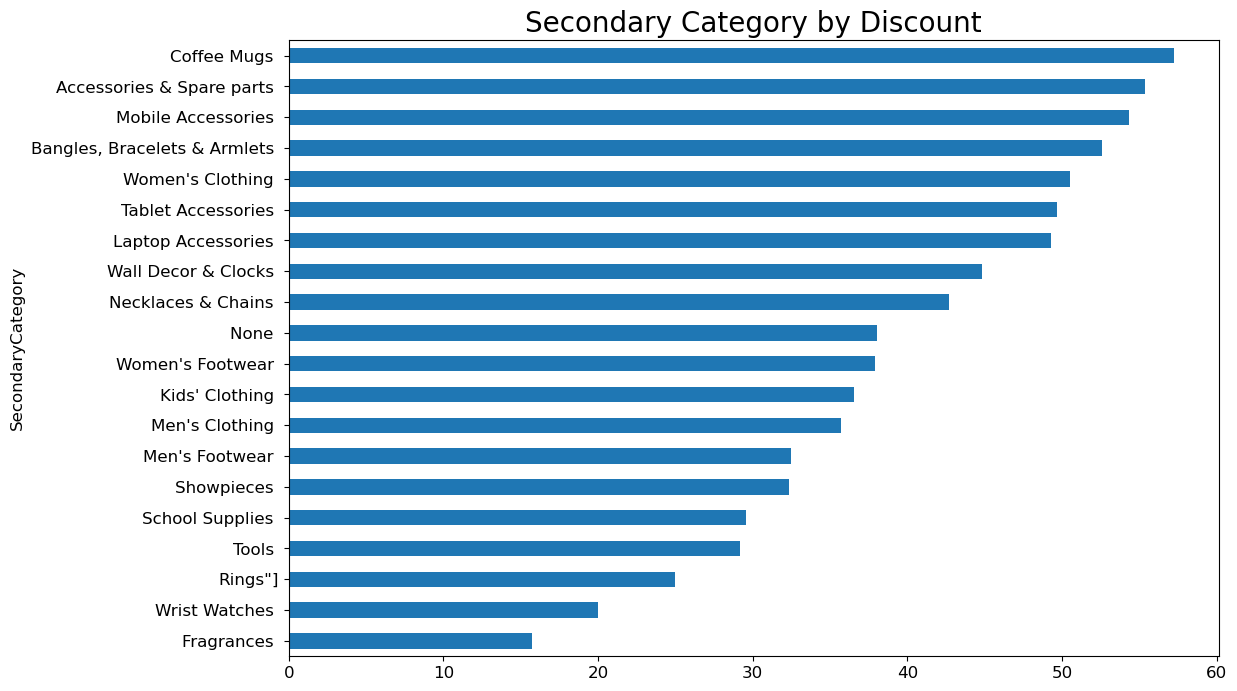

In [66]:
plt.figure(figsize=(12,8))
SecondaryCategoryDiscount['discount_%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Secondary Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('SecondaryCategory',fontsize=12)
plt.show()

In [67]:
print('Secondary Category by Discount (Percentage)\n')
print(SecondaryCategoryDiscount['discount_%_mean'].sort_values(ascending=False)[:8])

Secondary Category by Discount (Percentage)

SecondaryCategory
Coffee Mugs                      57.274172
Accessories & Spare parts        55.370314
Mobile Accessories               54.318421
Bangles, Bracelets & Armlets     52.560111
Women's Clothing                 50.500619
Tablet Accessories               49.673217
Laptop Accessories               49.320354
Wall Decor & Clocks              44.833213
Name: discount_%_mean, dtype: float64


In [ ]:
# For the secondary category, Coffee mug is in the lead with electronics and accessories & some clothing, spare parts and jewellery.

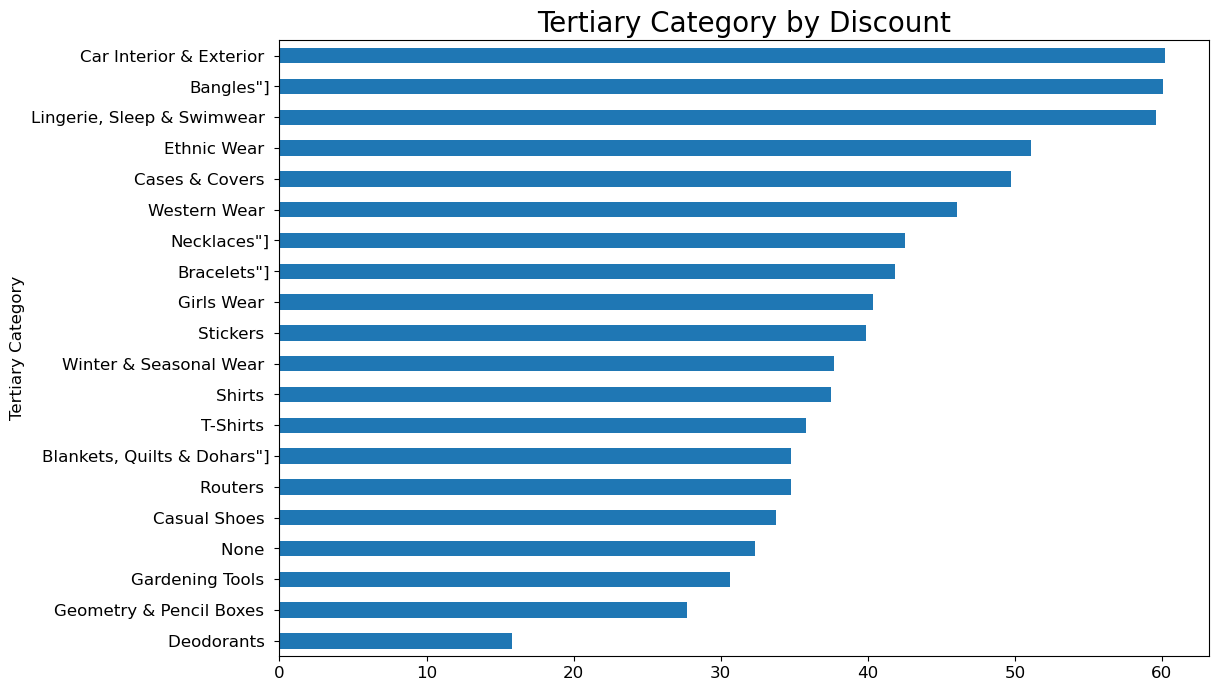

In [68]:
plt.figure(figsize=(12,8))
TertiaryCategoryDiscount['discount_%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Tertiary Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Tertiary Category',fontsize=12)
plt.show()

In [69]:
print('Tertiary Category by Discount (Percentage)\n')
print(TertiaryCategoryDiscount['discount_%_mean'].sort_values(ascending=False)[:8])

Tertiary Category by Discount (Percentage)

TertiaryCategory
Car Interior & Exterior        60.212741
Bangles"]                      60.057809
Lingerie, Sleep & Swimwear     59.606716
Ethnic Wear                    51.112810
Cases & Covers                 49.741058
Western Wear                   46.082203
Necklaces"]                    42.543918
Bracelets"]                    41.830400
Name: discount_%_mean, dtype: float64


In [ ]:
# Automotive parts on top again, followed by mostly jewellery and clothing. None is present. 

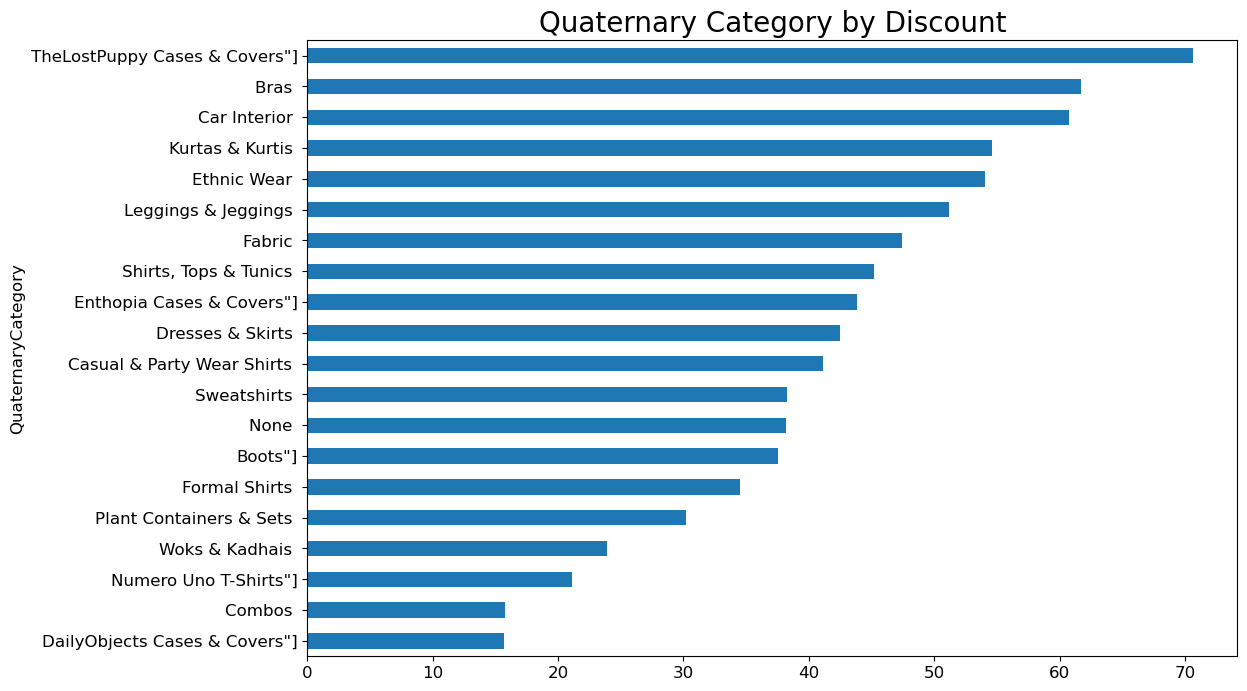

In [70]:
plt.figure(figsize=(12,8))
QuaternaryCategoryDiscount['discount_%_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Quaternary Category by Discount',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('QuaternaryCategory',fontsize=12)
plt.show()

In [71]:
print('Quaternary Category by Discount (Percentage)\n')
print(QuaternaryCategoryDiscount['discount_%_mean'].sort_values(ascending=False)[:8])

Quaternary Category by Discount (Percentage)

QuaternaryCategory
TheLostPuppy Cases & Covers"]    70.651528
Bras                             61.739034
Car Interior                     60.784170
Kurtas & Kurtis                  54.601485
Ethnic Wear                      54.036667
Leggings & Jeggings              51.212019
Fabric                           47.405738
Shirts, Tops & Tunics            45.196107
Name: discount_%_mean, dtype: float64


In [ ]:
# The Quaternary category is dominated by mostly clothing, with come automotive and electric categories.